# I Шум квантования

0. Научится генерировать синусойду нужной частоты при заданной частоте дискретизации.

0. Вычислить Фурье преобразование от такого сигнала.

0. Округлить вычисленный синус до разной степени точности и посмотреть влияние: график с фурье преобразованиями для разных округлений и идеал из б.

Округление… например 0.00001,  0.0001,  0.001,  0.01,  0.1. Или отмастшабированный на соответствующее количество бит.

In [1]:
import numpy as np
sample_rate = 44100 # Частота дискретизации
hz = 14000 # Частота
duration = 3 # Продолжительность в секундах
# Временной ряд синуса с заданными выше параметрами
# 2pi для перевода в радианы
ts = np.sin(np.pi*2*np.linspace(0, hz, sample_rate*duration))

In [2]:
from IPython.display import Audio
Audio(ts, rate=sample_rate)

round to 1.0


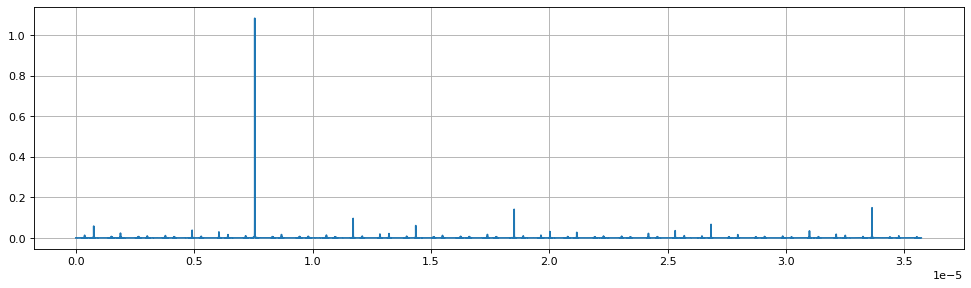

round to 0.1


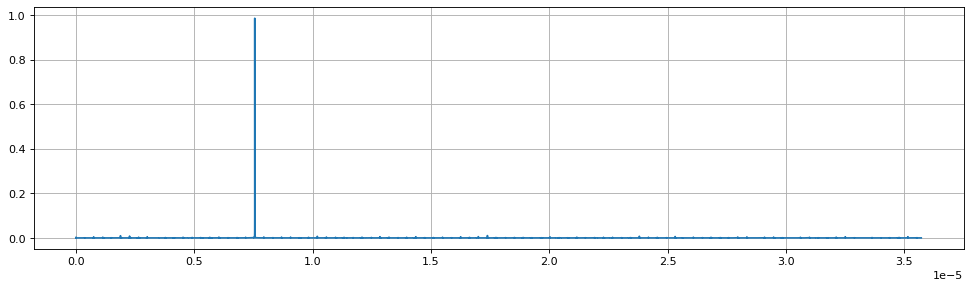

round to 0.01


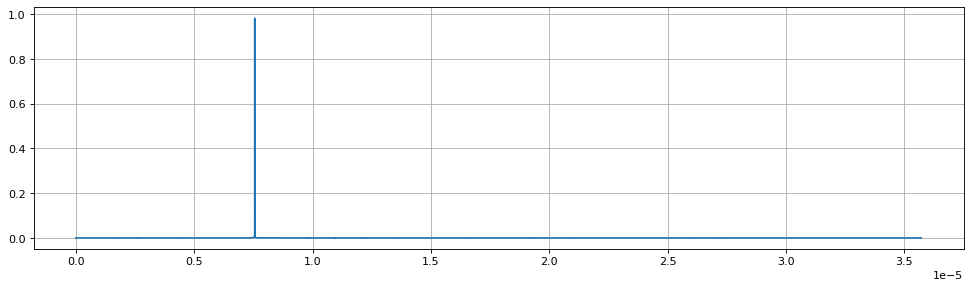

round to 0.001


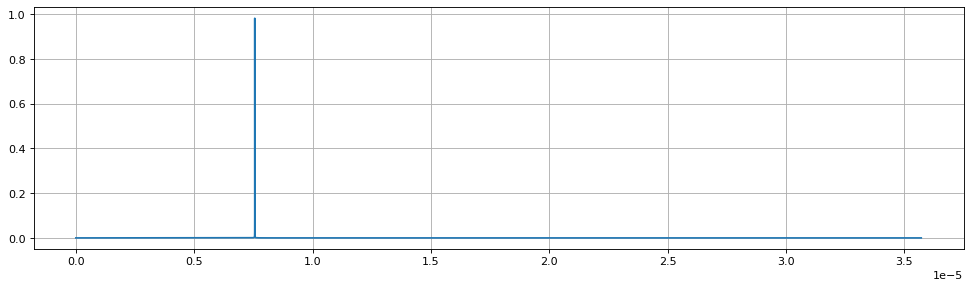

round to 0.0001


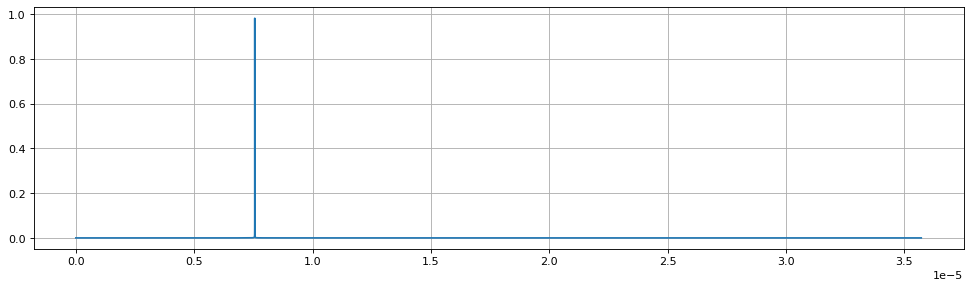

round to 1e-05


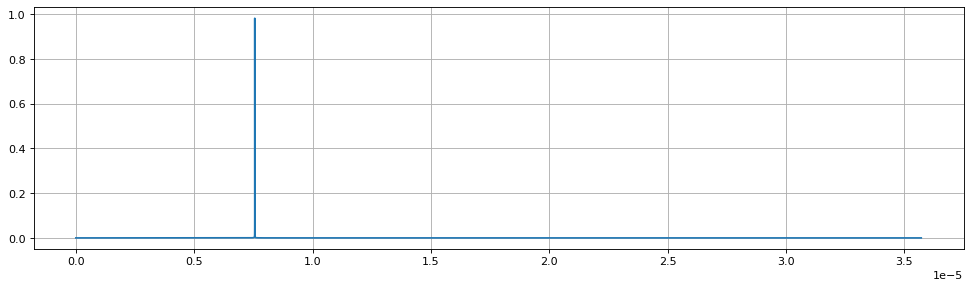

without round


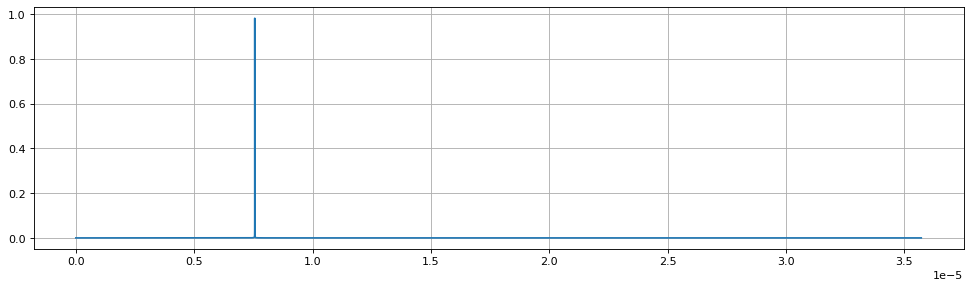

In [29]:
import matplotlib.pyplot as plt
for i in range(6):
    print(f'round to {1/(10**i)}')
    tss = np.round(ts, decimals=i)
    res = np.fft.fft(tss)
    y_f = np.fft.fft(tss)
    x_f = np.linspace(0, 1/(2*hz), len(tss)//2)

    plt.figure(figsize=(15, 4), dpi=80)
    plt.plot(x_f, 2.0/len(ts) * np.abs(y_f[:len(tss)//2]))
    plt.grid()
    plt.show()
print('without round')
tss = ts
res = np.fft.fft(tss)
y_f = np.fft.fft(tss)
x_f = np.linspace(0, 1/(2*hz), len(tss)//2)

plt.figure(figsize=(15, 4), dpi=80)
plt.plot(x_f, 2.0/len(ts) * np.abs(y_f[:len(tss)//2]))
plt.grid()
plt.show()

# II Спектограмма
0. Считать аудио файл (можно использовать библиотечные функции)
0. Научится добавлять писк (правильно подобранная синусойда) к аудио данным и записывать файл обратно. Убедится что слышен высокочастотный писк.
0. Посчитать спектрограмму (нужно реализовать самостоятельно)
0. Показать влияние синосойды
0. исследовать влияние различных оконных функций на построение в.

## III Линейный фильтр
0. Реализовать (во временной шкале!) какой-то из рекурсивных фильтров (Чебышёва, эллиптический...) для того чтобы убрать писк.
0. Построение АЧХ как аналитически, так и синтез по сгенерированным данным.
0. Показать какое влияние оказывает на спектрограмму.
0. Разобраться с построение каскада фильтров. Показать влияние очередности вычислений и округлений на результат. 

## IV Адаптивный фильтр
Реализация одного из:


0. активного шумоподавления
0. подавление эхо
0. «обратный» фильтр